In [3]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
import os
from pathlib import Path
import requests 
import json
import kagglehub

In [ ]:
kagglehub.login()
path = kagglehub.dataset_download("muhammadroshaanriaz/time-wasters-on-social-media", force_download=True)

print("Path to dataset files:", path)

100%|██████████| 36.0k/36.0k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\info\.cache\kagglehub\datasets\muhammadroshaanriaz\time-wasters-on-social-media\versions\1


Kaggle credentials set.
Kaggle credentials successfully validated.


In [5]:
file_to_load = Path(r"C:\Users\info\Desktop\team_11project1\data\Cleaned_dataset.csv")

In [6]:
# create dataframe
darkside_df = pd.read_csv(file_to_load)

# Display results
darkside_df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,Device Type,OS,Watch Time,Self Control,Addiction Level,Current Activity,Connection Type
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Brazil,62963,True,False,Waiting Staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting Staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting Staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


In [7]:
# check the columns in the dataset
print(darkside_df.columns)


Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'Device Type', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'Current Activity',
       'Connection Type'],
      dtype='object')


In [8]:
#Display basic information about Device Type and ProductivityLoss columns

print(darkside_df['ProductivityLoss'].describe())

count    1000.000000
mean        5.136000
std         2.122265
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: ProductivityLoss, dtype: float64


In [9]:
print(darkside_df['Device Type'].describe)

<bound method NDFrame.describe of 0      Smartphone
1        Computer
2          Tablet
3      Smartphone
4      Smartphone
          ...    
995    Smartphone
996    Smartphone
997    Smartphone
998    Smartphone
999    Smartphone
Name: Device Type, Length: 1000, dtype: object>


In [10]:
#Group by Device Type Measurements 
device_productivity_avg = darkside_df.groupby('Device Type')['ProductivityLoss'].mean()
device_productivity_avg

Device Type
Computer      5.143939
Smartphone    5.217094
Tablet        4.964664
Name: ProductivityLoss, dtype: float64

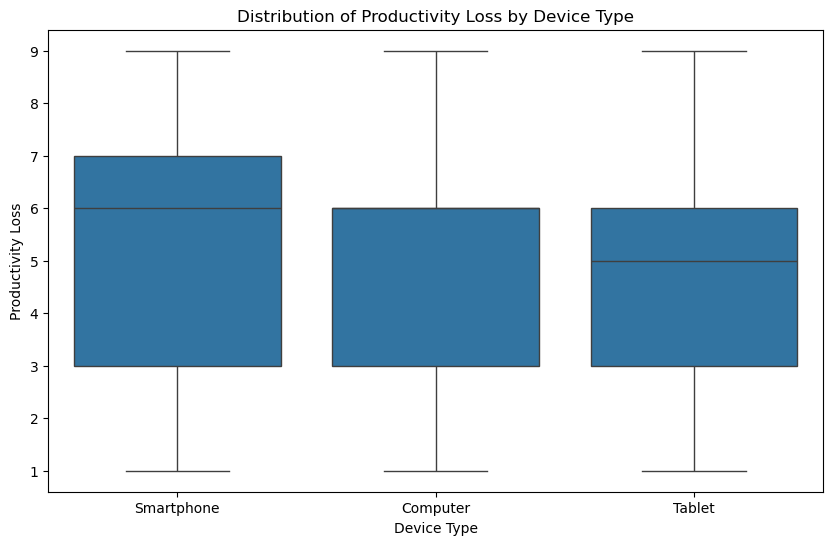

In [11]:
# Create box plot with the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Device Type', y='ProductivityLoss', data=darkside_df)
plt.xlabel('Device Type')
plt.ylabel('Productivity Loss')
plt.title('Distribution of Productivity Loss by Device Type')
plt.show()

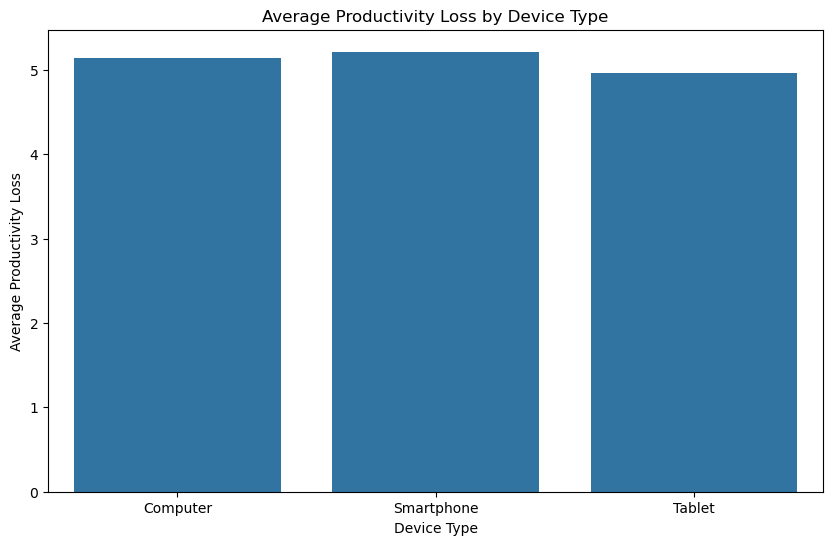

In [12]:
#create bar plot with averages
plt.figure(figsize=(10, 6))
sns.barplot(x=device_productivity_avg.index, y=device_productivity_avg.values)
plt.xlabel('Device Type')
plt.ylabel('Average Productivity Loss')
plt.title('Average Productivity Loss by Device Type')
plt.show()

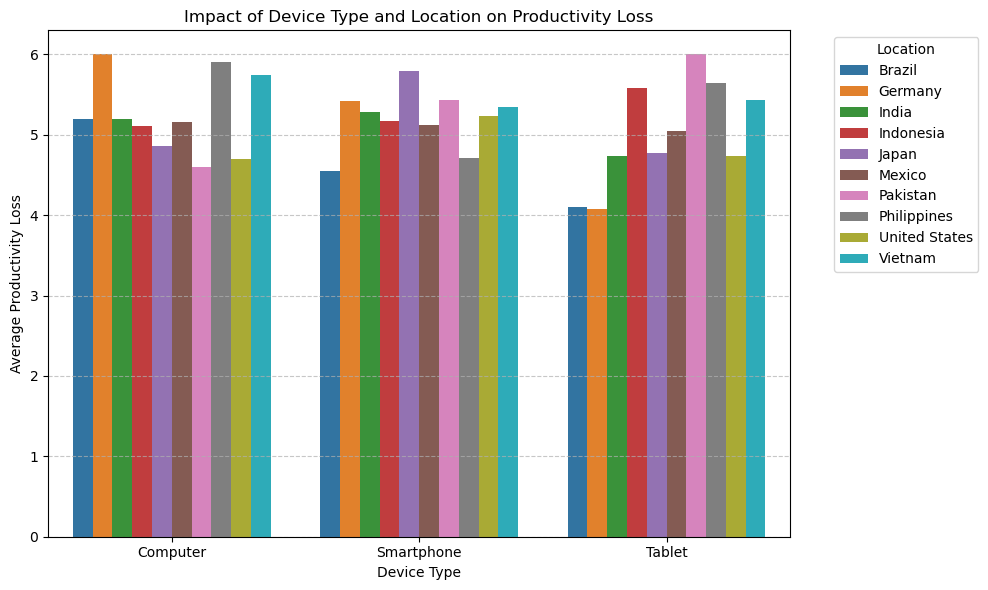

In [13]:
#Group by Device Type Measurements 
device_location_productivity = darkside_df.groupby(['Device Type', 'Location'])['ProductivityLoss'].mean().reset_index()

device_location_productivity


# Create bar plot with averages
plt.figure(figsize=(10, 6))
sns.barplot(x='Device Type', y= 'ProductivityLoss', hue='Location', data=device_location_productivity)
plt.xlabel('Device Type')
plt.ylabel('Average Productivity Loss')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Impact of Device Type and Location on Productivity Loss')
plt.tight_layout()
plt.show()

In [19]:
#Group by Device Type Measurements 
device_profession_productivity = darkside_df.groupby(['Device Type', 'Profession'])['ProductivityLoss'].mean()
device_profession_productivity

Device Type  Profession   
Computer     Artist           5.111111
             Cashier          5.733333
             Driver           4.727273
             Engineer         4.900000
             Labor/Worker     5.214286
             Manager          4.875000
             Students         4.882353
             Teacher          5.428571
             Waiting Staff    5.416667
Smartphone   Artist           5.520000
             Cashier          4.913043
             Driver           5.171429
             Engineer         5.256410
             Labor/Worker     5.267857
             Manager          5.000000
             Students         5.047619
             Teacher          5.318182
             Waiting Staff    5.438596
Tablet       Artist           4.846154
             Cashier          5.055556
             Driver           4.687500
             Engineer         5.000000
             Labor/Worker     4.900000
             Manager          5.230769
             Students         5.06153

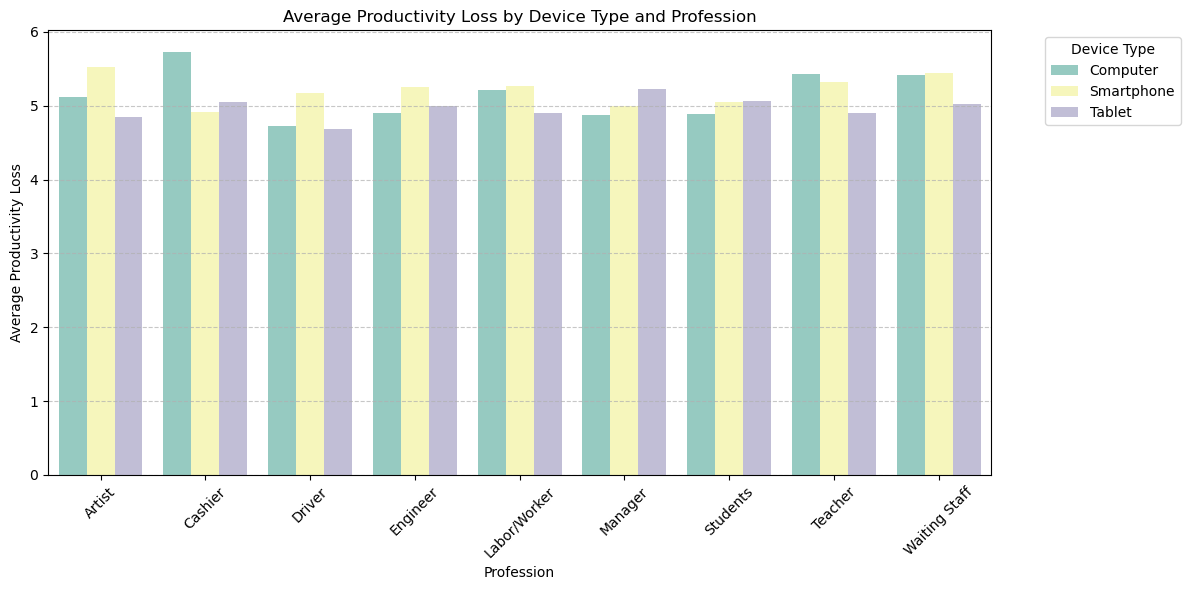

In [21]:
device_profession_productivity = device_profession_productivity.reset_index()

# Display a cluster plot
plt.figure(figsize=(12, 6))
sns.barplot(data=device_profession_productivity, x="Profession", y="ProductivityLoss", hue="Device Type", palette="Set3")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Profession")
plt.ylabel("Average Productivity Loss")
plt.title("Average Productivity Loss by Device Type and Profession")
plt.legend(title="Device Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

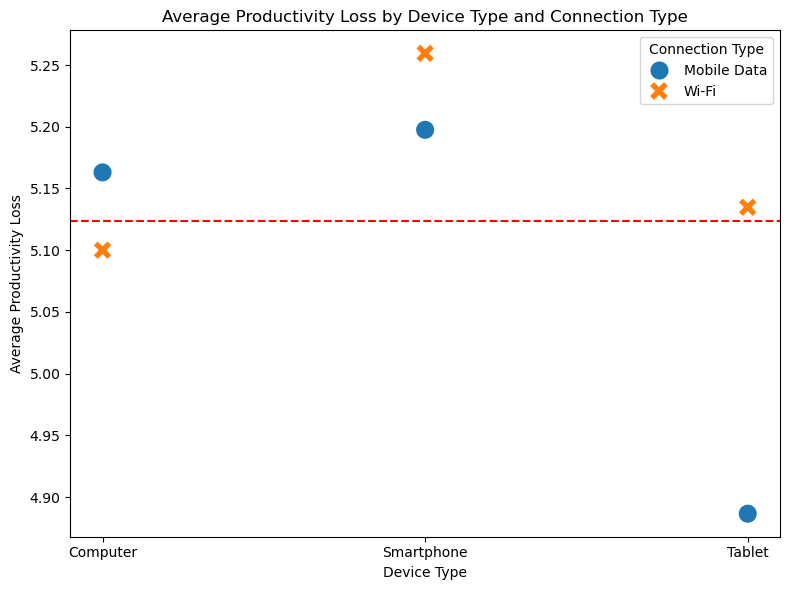

In [26]:
#Group by Device Type Measurement
device_connection_productivity = darkside_df.groupby(['Device Type', 'Connection Type'])['ProductivityLoss'].mean()

# Calculate the overall mean productivity loss for the annotation line
mean_productivity_loss = device_connection_productivity.mean()

# Reset the index to make 'Device Type' and 'Connection Type' columns
device_connection_productivity = device_connection_productivity.reset_index()

# Scatter plot with Device Type on x-axis, Productivity Loss on y-axis, and Connection Type as color
plt.figure(figsize=(8, 6))
sns.scatterplot(data=device_connection_productivity, x='Device Type', y='ProductivityLoss', hue='Connection Type', style='Connection Type', s=200)
plt.xlabel('Device Type')
plt.ylabel('Average Productivity Loss')
plt.title("Average Productivity Loss by Device Type and Connection Type")
plt.legend(title="Connection Type")
plt.axhline(y=mean_productivity_loss, color='red', linestyle='--', linewidth=1.5, label=f'Average Productivity Loss ({mean_productivity_loss:.2f})')
plt.tight_layout()
plt.show()